# Homework 8 Notebook
### Cody Costa, David Loi

In [36]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import scipy.stats as stats
import os

#### Load Data to Analyze

In [37]:
data = pd.read_csv('emnist-digits-test.csv', header=None, sep=',', dtype='uint')
data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Filter data into suggested usable set (sum of each row in the table)

In [38]:
row_sums = np.sum(data, axis=1)
row_sums

0        40376
1        21547
2        35224
3        39065
4        45823
         ...  
39995    30171
39996    30904
39997    37759
39998    23020
39999    32676
Length: 40000, dtype: uint64

#### Visualize Data

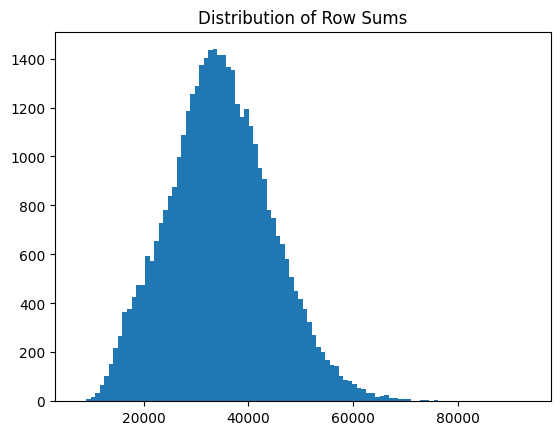

In [39]:
plt.hist(row_sums, bins=100)
plt.title('Distribution of Row Sums')
plt.show()

# Part 1
#### Compute Mean and Variance

In [40]:
MEAN = np.round(np.mean(row_sums), 1)
VARIANCE = np.round(np.var(row_sums), 1)

In [41]:
MEAN, VARIANCE

(34698.3, 99515279.6)

# Part 2
#### For a Sample Size of 50, Calculate 1000 random reps of the MEAN, and estimate the VARIANCE

In [42]:
sample_size = 50
num_runs = 1000

random_mean_vals = np.zeros(num_runs)
random_variance_vals = np.zeros(num_runs)

for j in range(num_runs):
    sample_set = np.zeros(sample_size)

    for k in range(sample_size):
        sample_set[k] = row_sums[np.random.randint(0, row_sums.shape[0])]

    random_mean_vals[j] = np.mean(sample_set)
    random_variance_vals[j] = np.var(sample_set)

In [43]:
random_mean_vals.shape, random_variance_vals.shape

((1000,), (1000,))

In [44]:
random_mean_vals

array([34036.  , 35341.18, 35948.52, 35125.76, 32902.74, 33651.32,
       35079.54, 36071.22, 35866.3 , 32977.  , 36572.16, 34821.26,
       34384.12, 36611.34, 33655.56, 34563.14, 35479.28, 34462.42,
       34062.08, 34574.86, 34210.96, 34997.14, 36257.48, 35475.4 ,
       35767.8 , 35443.56, 34108.72, 36549.86, 33022.26, 33618.88,
       32835.68, 33367.44, 35308.24, 34015.06, 34178.56, 34354.92,
       34408.7 , 34931.04, 34719.46, 33323.16, 32697.9 , 34472.84,
       37556.1 , 34836.64, 34081.  , 34108.82, 35661.68, 33647.34,
       36805.8 , 36147.6 , 35037.74, 32688.2 , 36998.18, 34217.62,
       35951.96, 37163.12, 33219.86, 34052.98, 34137.72, 35715.66,
       33466.36, 35062.06, 34899.46, 36256.32, 35826.82, 36642.02,
       35477.  , 33970.58, 33419.38, 36379.66, 33981.2 , 33749.94,
       32860.48, 37357.74, 32489.62, 33258.12, 35180.5 , 33222.56,
       31415.26, 33669.58, 35411.24, 34048.28, 35325.76, 35514.44,
       37322.96, 32875.9 , 35895.26, 34880.5 , 34461.42, 33433

In [45]:
random_variance_vals

array([9.10113077e+07, 1.19442035e+08, 8.99424698e+07, 8.53384117e+07,
       7.87917379e+07, 9.42837104e+07, 1.25514213e+08, 1.35646761e+08,
       9.58808690e+07, 8.22413081e+07, 6.44202113e+07, 8.51284402e+07,
       7.78810959e+07, 8.43922738e+07, 1.44738041e+08, 1.13372018e+08,
       1.28328208e+08, 5.60514289e+07, 9.67463988e+07, 8.25398527e+07,
       8.36512444e+07, 8.79518182e+07, 8.75541932e+07, 1.39568845e+08,
       8.68969165e+07, 8.97440648e+07, 1.13849402e+08, 7.98124413e+07,
       1.27417142e+08, 8.97891442e+07, 9.91816165e+07, 1.18546144e+08,
       1.24870453e+08, 1.16004886e+08, 9.50155526e+07, 9.23580832e+07,
       1.02342335e+08, 9.41114870e+07, 1.04310691e+08, 1.18443256e+08,
       7.80197220e+07, 5.89479520e+07, 1.07652070e+08, 9.61072150e+07,
       1.08797881e+08, 8.86212860e+07, 9.41808899e+07, 8.48033110e+07,
       1.27822900e+08, 1.06593565e+08, 8.14430006e+07, 8.11810004e+07,
       9.95085377e+07, 8.60595230e+07, 1.28750260e+08, 1.36073991e+08,
      

# Part 3
#### Estimate the sample mean variance

In [46]:
np.round(np.mean(random_variance_vals), 1)

97261585.3

#### Compute Error Between Global and Sample Variance

In [47]:
var_err = 100 * abs(VARIANCE - np.mean(random_variance_vals)) / VARIANCE
print(f'{np.round(var_err, 2)} % error')

2.26 % error


# Part 4
#### Compare Interval Estimate of the Sample Mean

#### method 1, plot results using estimated value of the sample mean variance
#### The below figure plots both normal distributions as a comparison between the exact and estimated data

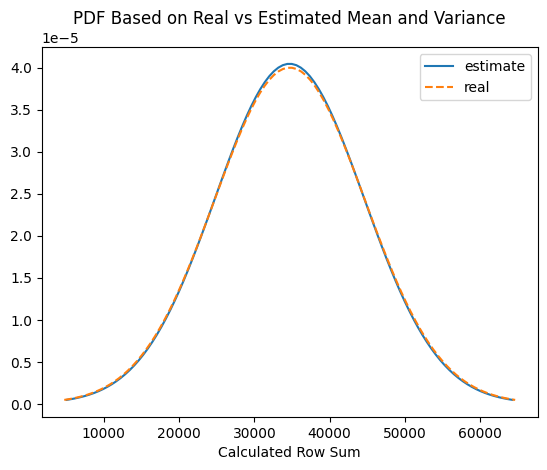

In [48]:
# plot a distribution of estimated values of the mean and variance

sigma = np.sqrt(np.mean(random_variance_vals))
mu = np.mean(random_mean_vals)

x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))


# plot a distribution of the real values of the mean and variance

y = np.linspace(MEAN - 3 * np.sqrt(VARIANCE), MEAN + 3 * np.sqrt(VARIANCE), 100)
plt.plot(y, stats.norm.pdf(y, MEAN, np.sqrt(VARIANCE)), '--')

plt.legend(['estimate', 'real'])
plt.title('PDF Based on Real vs Estimated Mean and Variance')
plt.xlabel('Calculated Row Sum')
plt.show()

#### both graphs line up nicely, low error

#### method 2, graph a histogram of estimated sample mean values

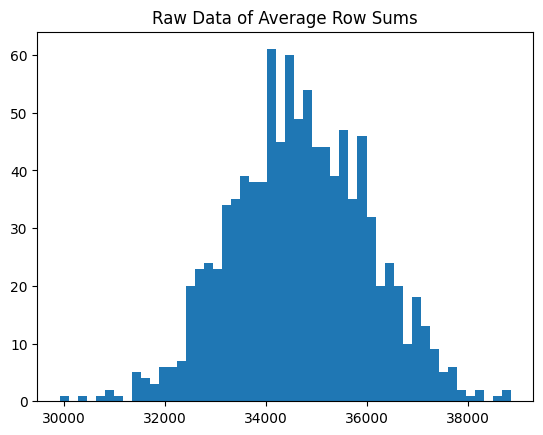

In [49]:
plt.hist(random_mean_vals, bins=50)
plt.title('Raw Data of Average Row Sums')
plt.show()

#### we can observe the histogram compared to the plot of the estimated data by scaling the graphs

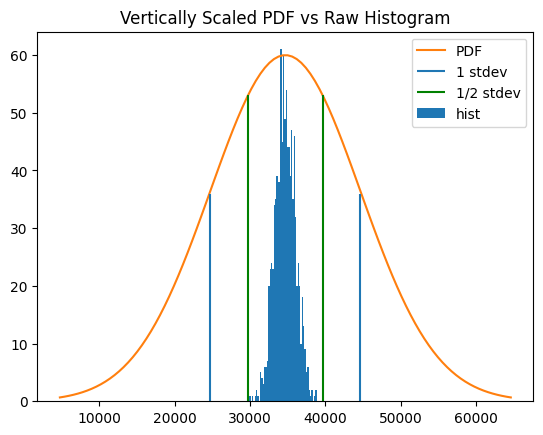

In [50]:
plt.hist(random_mean_vals, bins=50)
plt.plot(y, 15e5*stats.norm.pdf(y, MEAN, np.sqrt(VARIANCE)))

# mark +/- 1 stdev away from mean
plt.vlines([MEAN-np.sqrt(VARIANCE), MEAN+np.sqrt(VARIANCE)], ymin=0, ymax=36)

# mark +/- 1/2 stdev away from mean
plt.vlines([MEAN-np.sqrt(VARIANCE)/2, MEAN+np.sqrt(VARIANCE)/2], ymin=0, ymax=53, colors='green')

plt.title('Vertically Scaled PDF vs Raw Histogram')
plt.legend(['PDF', '1 stdev', '1/2 stdev', 'hist'])
plt.show()

#### Find where the extremes of the histogram fall on the plot

In [51]:
hist_min = np.min(random_mean_vals)
hist_max = np.max(random_mean_vals)

print(f'histogram min = {np.round(hist_min)},\t{np.round((hist_min - MEAN) / np.sqrt(VARIANCE), 2)}\tstdev\'s away from the mean')
print(f'histogram max = {np.round(hist_max)},\t{np.round((hist_max - MEAN) / np.sqrt(VARIANCE), 2)}\tstdev\'s away from the mean')

histogram min = 29923.0,	-0.48	stdev's away from the mean
histogram max = 38846.0,	0.42	stdev's away from the mean


# Part 5
#### Analysis of Results
#### On average, the extremes of the histogram fall within +/- 0.5 standard deviations from the true mean value of the distribution, therefore we can conclude our estimate of the mean and variance is accurate

#### Save as HTML

In [52]:
os.system('jupyter nbconvert hw8.ipynb --to html')

0